In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import gc

# 
import datetime

# Jupyter stuff
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.text_cell_render p, .text_cell_render li { font-size: 13pt !important; }</style>"))
display(HTML("<style>.text_cell_render li { margin: 0 0 10px 0; }</style>"))

In [2]:
# Se importa el dataset
df = pd.read_csv("mediciones-netatmo-renam.csv") 

In [3]:
display(df.head(5))
print(df.shape)
print("Mostrando los nulos")
display(df.isnull().sum())

,id,user_id,dispositivo_id,sector,temperatura,humedad,co2,ruido,measured_at,local_measured_at,js_measured_at,created_at,updated_at,vivienda_id
0,523815,127.0,2.0,0,16.5,77.0,1080.0,37.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648008,1494648008,6
1,523816,127.0,2.0,0,16.4,77.0,1074.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648008,1494648008,6
2,523817,113.0,3.0,0,15.7,73.0,891.0,38.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648012,1494648012,9
3,523818,113.0,3.0,0,15.6,73.0,894.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648012,1494648012,9
4,523819,109.0,4.0,0,21.0,75.0,3991.0,59.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648016,1494648016,11


(10169108, 14)
Mostrando los nulos


id                         0
user_id               299473
dispositivo_id        156446
sector                     0
temperatura              210
humedad                  210
co2                  4726543
ruido                4725843
measured_at                0
local_measured_at          0
js_measured_at             0
created_at                 0
updated_at                 0
vivienda_id                0
dtype: int64

Al ver el dataset se aprecia que hay 10169108 registros con 14 columnas cada uno. Resulta que la caracteristica sector indica 0 si es que la medicion es dentro de la casa o 1 si es que es fuera de ésta, para usos de esta memoria se determina que las mediciones dentro de la casa y fuera de esta deben de vivir en el mismo registro por lo que se carga el csv en una base de datos (postgres) y se decide realizar dicha unificación, así es como se obtiene el nuevo dataset *'mediciones_netatmo_unificadas.csv'*

In [4]:
try:
    del df
except:
    print("No hay df definido :(")
gc.collect()

df = pd.read_csv("mediciones_unificadas.csv") 

In [5]:
display(df.head(5))
display(df.describe())
display(df.isnull().sum())
print(df.shape)
print("Viviendas distintas:",len(df.vivienda_id.unique()))

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at
0,1,NaN,3,26.3,48,NaN,NaN,27.5,35,1448569800,2015-11-26 17:30:00
1,2,NaN,3,25.2,47,42.0,66.0,25.4,35,1448571600,2015-11-26 18:00:00
2,3,NaN,3,23.9,45,130.0,59.0,23.4,38,1448573400,2015-11-26 18:30:00
3,4,NaN,3,23.3,46,278.0,44.0,22.4,38,1448575200,2015-11-26 19:00:00
4,5,NaN,3,24.0,46,399.0,44.0,21.5,39,1448577000,2015-11-26 19:30:00


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
count,4.731498e+06,4.653350e+06,4.731498e+06,4.731498e+06,4.731498e+06,4.731333e+06,4.731352e+06,4.731498e+06,4.731498e+06,4.731498e+06
mean,2.365750e+06,1.497018e+02,1.468023e+02,1.983571e+01,5.841729e+01,6.553012e+02,4.434105e+01,1.660592e+01,6.643283e+01,1.517827e+09
std,1.365866e+06,8.465548e+01,8.426349e+01,4.103601e+00,1.130619e+01,6.458876e+02,8.948838e+00,6.370523e+00,1.518488e+01,1.865352e+07
min,1.000000e+00,1.000000e+00,2.000000e+00,2.300000e+00,8.000000e+00,0.000000e+00,3.300000e+01,-1.580000e+01,1.300000e+01,1.448570e+09
25%,1.182875e+06,7.900000e+01,7.600000e+01,1.700000e+01,5.100000e+01,4.110000e+02,3.700000e+01,1.220000e+01,5.600000e+01,1.504723e+09
50%,2.365750e+06,1.480000e+02,1.420000e+02,1.980000e+01,5.900000e+01,5.170000e+02,4.200000e+01,1.610000e+01,6.800000e+01,1.517013e+09
75%,3.548624e+06,2.150000e+02,2.140000e+02,2.280000e+01,6.600000e+01,7.560000e+02,5.000000e+01,2.060000e+01,7.800000e+01,1.531822e+09
max,4.731498e+06,3.100000e+02,3.070000e+02,5.800000e+01,1.000000e+02,5.000000e+03,9.500000e+01,5.480000e+01,1.000000e+02,1.554253e+09


id                          0
dispositivo_id          78148
vivienda_id                 0
temperatura_interior        0
humedad_interior            0
co2                       165
ruido                     146
temperatura_exterior        0
humedad_exterior            0
measured_at                 0
date_measured_at            0
dtype: int64

(4731498, 11)
Viviendas distintas: 303


Ahora al ver el nuevo dataset unificado se aprecia que hay 4731498 registros, estos de un total de 303 viviendas distintas. Se aprecia que hay una gran cantidad de registros con dispositivo_id nulos, pero esto no es relevante ya que no es una variable a utilizar en el análisis. Hay unos pocos registros con nulos en variables revelantes como co2 y ruido (todo al interior de la casa)

In [ ]:
# Código que importa el csv a postgres
import psycopg2

def export_to_db():
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "abc123",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "memoria")
        cursor = connection.cursor()

        insert_rows_format = '''
        insert into mediciones_netatmo
        (dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
        values ({}, {}, {}, {}, {}, {}, {}, {}, '{}'),
        '''
        row_format = "({}, {}, {}, {}, {}, {}, {}, {}, '{}')"
        i = 0
        for row in df.itertuples(index=True, name='Pandas'):
            # print getattr(row, "c1"), getattr(row, "c2")

            sector = False

            dispositivo_id = getattr(row, 'dispositivo_id')
            vivienda_id = getattr(row, 'vivienda_id')

            if getattr(row, 'sector') == 1:
                sector = True

            temperatura = getattr(row, 'temperatura')
            humedad = getattr(row, 'humedad')
            co2 = getattr(row, 'co2')
            ruido = getattr(row, 'ruido')
            measured_at = getattr(row, 'measured_at')
            date_measured_at = getattr(row, 'local_measured_at')

            if i == 0:
                SQL = insert_rows_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            elif i < 5000:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)+","
            else:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
                SQL = SQL.replace("nan", "NULL")
                cursor.execute(SQL)
                connection.commit()
                SQL = ""
                i = -1
            i+=1

        if SQL != "":
            SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            SQL = SQL.replace("nan", "NULL")
            cursor.execute(SQL)
            connection.commit()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)
    finally:
        #closing database connection.
            if(connection):
                cursor.close()
                connection.close()
                print("PostgreSQL connection is closed")
                
# export_to_db()

Se va a proceder a sacar una muestra del orden del 10% de los datos para poder graficar las variables

In [15]:
df_sample = df.sample(frac=0.05, replace=False, random_state=22)

In [19]:
print("Mostrando la forma de la muestra")
print(df_sample.shape)

Mostrando la forma de la muestra
(236575, 11)


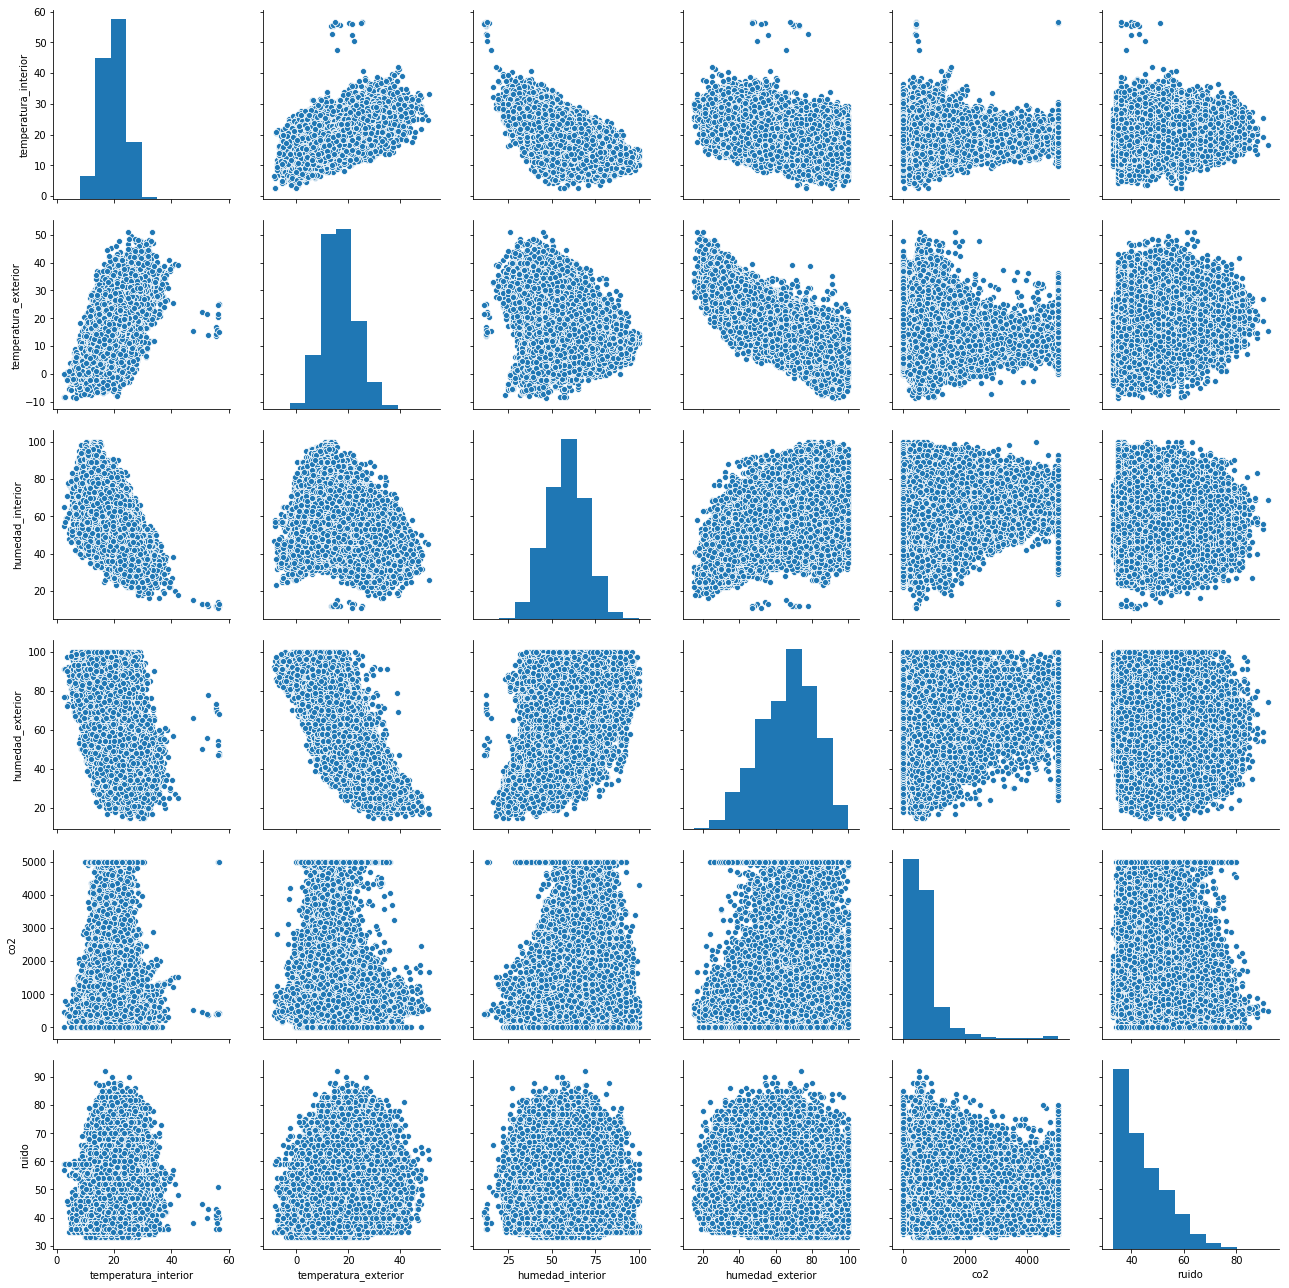

In [17]:
VARIABLES = ['temperatura_interior', 'temperatura_exterior', 'humedad_interior', 'humedad_exterior', 'co2', 'ruido']

sns.pairplot(df_sample, vars=VARIABLES, height=3, dropna=True);

Al ver el gráfico del cruce de todas las variables se aprecia lo siguiente
- **Temperatura interior:** Se relaciona con la temperatura exterior y la humedad interior
- **Temperatura exterior:** Se relaciona con humedad exterior y temperatura interior
- **Humedad interior:** Se relaciona con temperatura interior
- **Humedad exterior:** Se relaciona con temperatura interior
- **Humedad interior:** Se relaciona con temperatura exterior

Al ver el co2 y el ruido no se aprecia alguna relacion aparente.


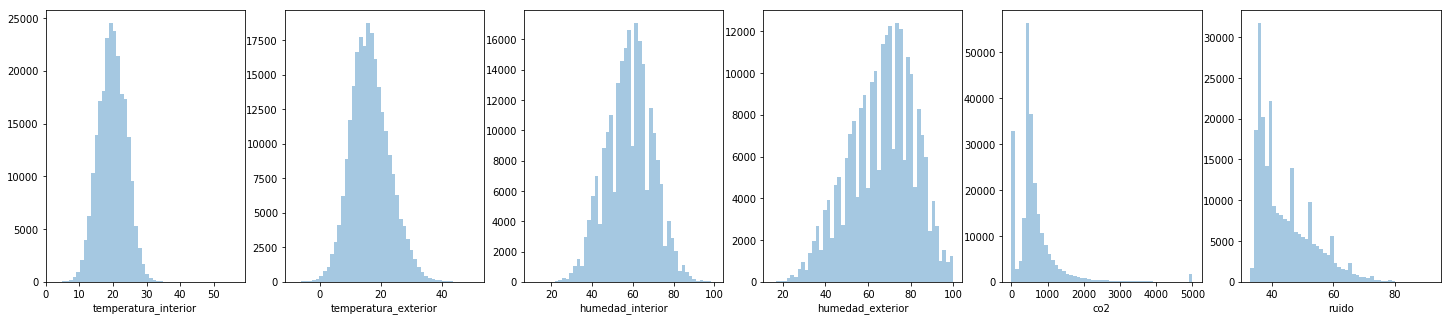

In [18]:
fig, ax = plt.subplots(1, 6, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.distplot(df_sample[VARIABLES[i]].dropna(), hist=True, kde=False, ax=ax[i])
    
plt.show()

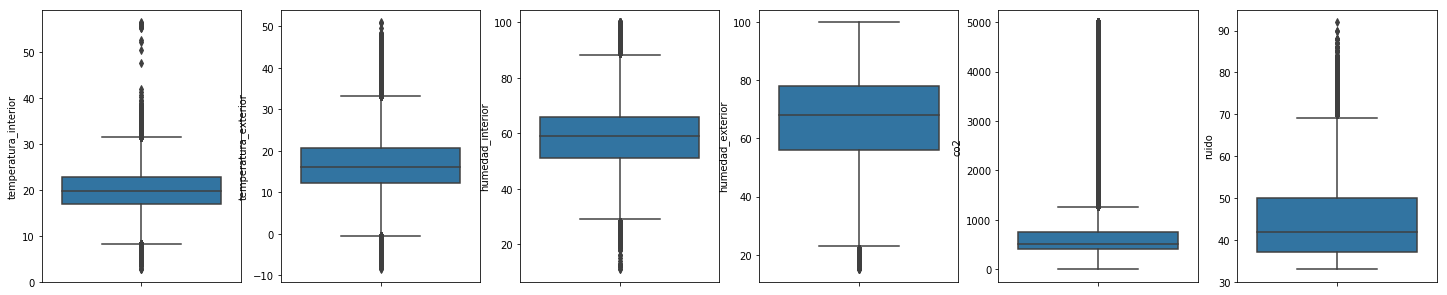

In [23]:
fig, ax = plt.subplots(1, 6, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.boxplot(x=df_sample[VARIABLES[i]].dropna(), ax=ax[i], orient="v")